<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Credit_card_fraud_detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Content**:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# connecting kaggle using API token
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
# Loading the data fromm kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.71GB/s]


In [3]:
# unzipping the data
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
credit_card_df = pd.read_csv('creditcard.csv')

In [ ]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_df.shape

(284807, 31)

In [ ]:
credit_card_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#checking duplicates

credit_card_df.duplicated().sum()

np.int64(1081)

In [ ]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_df.drop(columns=['Class']).describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Observation: The transaction amount range is 0-25691.  

Data Visulaization

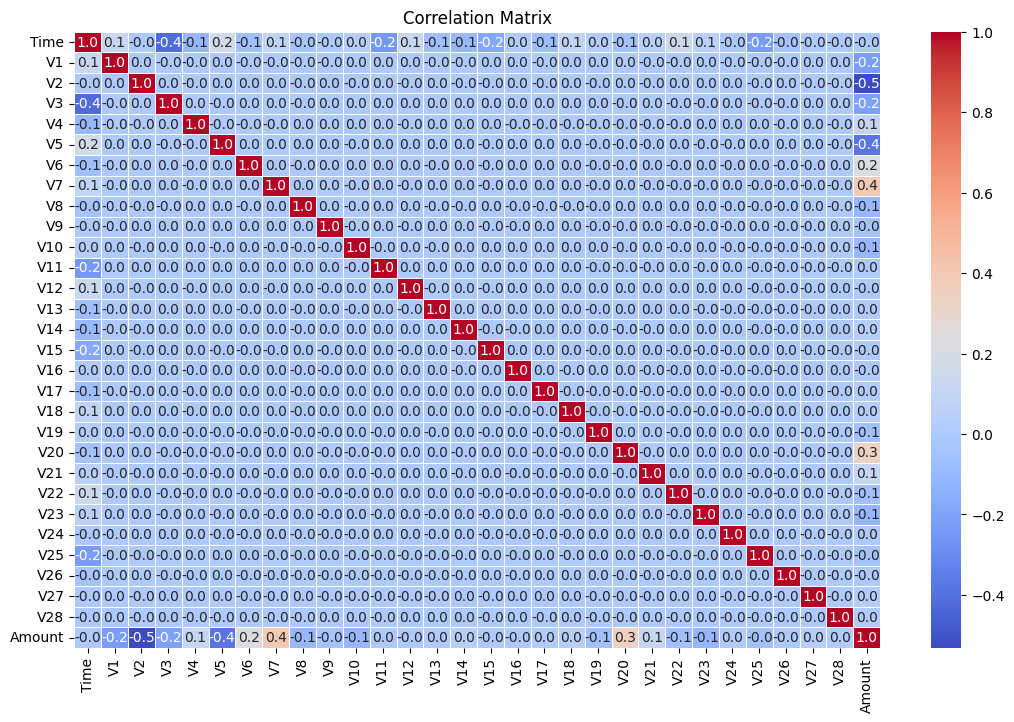

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(13,8))
sns.heatmap(credit_card_df.drop(columns=['Class']).corr(), annot=True, fmt=".1f", cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
credit_card_df['Class'].value_counts()

,count
Class,
0,284315
1,492


The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

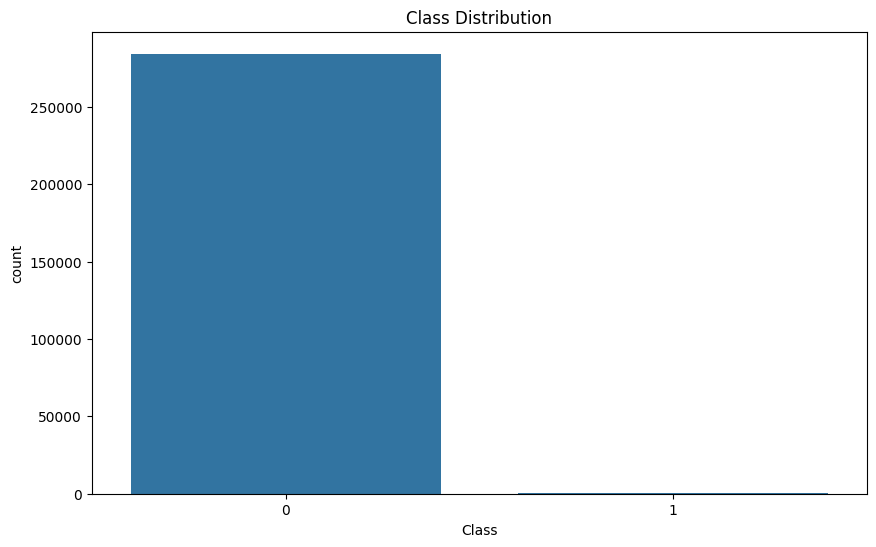

In [ ]:
#visualalizing the class distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=credit_card_df)
plt.title('Class Distribution')
plt.show()

fraudulent transactions tend to have smaller amounts compared to non-fraudulent transactions. This suggests fraudsters often test with small transactions first to avoid triggering alarms.

In [ ]:
stats = credit_card_df.groupby('Class')['Amount'].describe()
print(stats)

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


Observation:

Fraudulent transactions have a much lower median (e.g., $9.25) than
 non-fraudulent ones (e.g., $22).

This suggests fraudsters often test with small transactions first to avoid triggering alarms

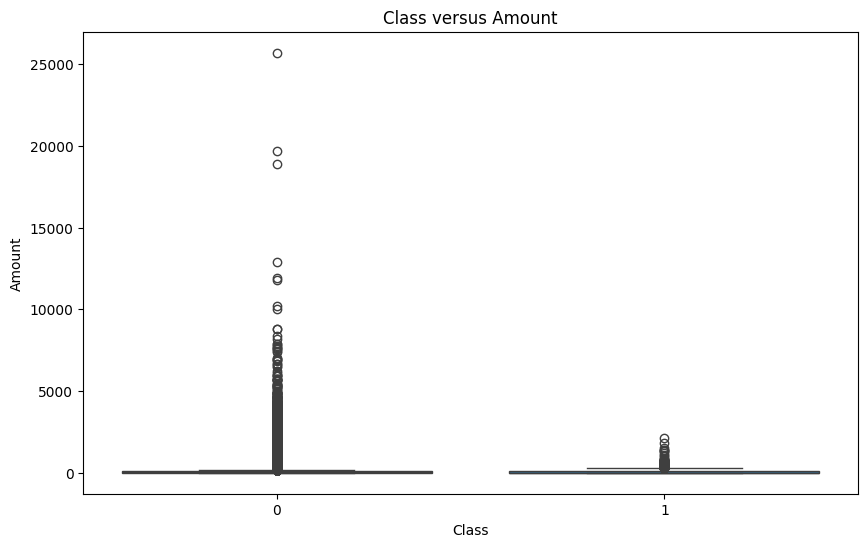

In [ ]:
# Class versus amount
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=credit_card_df)
plt.title('Class versus Amount')
plt.show()

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

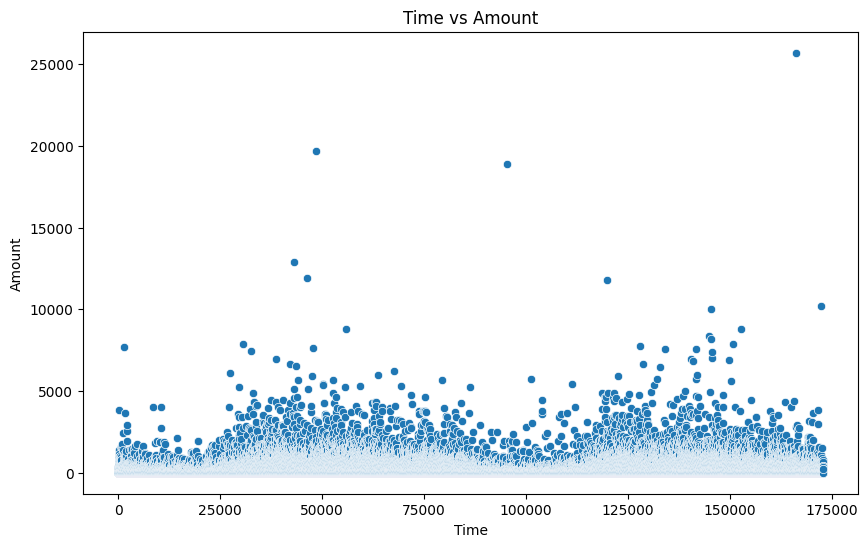

In [ ]:
# Time vs Amount
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', data=credit_card_df)
plt.title('Time vs Amount')
plt.show()

Checking multicollinearity using VIF

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = credit_card_df.drop(columns=['Class']).columns
vif_data["VIF"] = [variance_inflation_factor(credit_card_df.drop(columns=['Class']).values, i) for i in range(credit_card_df.drop(columns=['Class']).shape[1])]
print(vif_data)


   feature        VIF
0     Time   2.339084
1       V1   1.621694
2       V2   3.869377
3       V3   1.255585
4       V4   1.137944
5       V5   2.753075
6       V6   1.522122
7       V7   2.510165
8       V8   1.097151
9       V9   1.018831
10     V10   1.115668
11     V11   1.028861
12     V12   1.011961
13     V13   1.003434
14     V14   1.026832
15     V15   1.014135
16     V16   1.000371
17     V17   1.004772
18     V18   1.006568
19     V19   1.037809
20     V20   2.233934
21     V21   1.100720
22     V22   1.082384
23     V23   1.149268
24     V24   1.000659
25     V25   1.013388
26     V26   1.000487
27     V27   1.008979
28     V28   1.001425
29  Amount  11.499791


We are not going to drop any columns based on the VIF as Amount is the import parameter.

Data Preprocessing

In [6]:
# Standarad Scaler (Works best when data is roughly Gaussian (like PCA features))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_card_df[['Time','Amount']] = scaler.fit_transform(credit_card_df[['Time','Amount']])

In [7]:
credit_card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


Train Test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_card_df.drop(columns=['Class']), credit_card_df['Class'], test_size=0.2, random_state=42)

In [9]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.022112,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289
165061,0.470837,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717
238186,1.152945,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292
150562,-0.024087,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306
138452,-0.256040,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239


In [ ]:
y_train

,Class
223361,0
165061,0
238186,0
150562,0
138452,0
...,...
119879,0
259178,0
131932,0
146867,0


Model Training and performance parameters

In [10]:
# Model importing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Model tune import
from sklearn.model_selection import GridSearchCV

# Model performace import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Training each model and calculating performance metrics
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:\n")
    print(classification_report(y_test, y_pred))
    print("-"*50)



Logistic Regression Accuracy: 0.9991397773954567
Confusion Matrix:

[[56854    10]
 [   39    59]]
Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
Decision Tree Accuracy: 0.9991046662687406
Confusion Matrix:

[[56835    29]
 [   22    76]]
Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.78      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
Rand

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

def evaluate_model(X_train, y_train, X_test, y_test, model):

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    recall_val = recall_score(y_test, y_pred_test)
    precision_val = precision_score(y_test, y_pred_test)
    f1_val = f1_score(y_test, y_pred_test)

    return train_accuracy, test_accuracy, recall_val, precision_val, f1_val


results_list = []

for name, model in models.items():
    train_acc, test_acc, recall, precision, f1 = evaluate_model(X_train, y_train, X_test, y_test, model)
    results_list.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Recall Score': recall,
        'Precision Score': precision,
        'F1 Score': f1
    })

In [ ]:
results = pd.DataFrame(results_list)
print(results.sort_values(by="F1 Score",ascending=False).to_string(index=False))

              Model  Train Accuracy  Test Accuracy  Recall Score  Precision Score  F1 Score
      Random Forest        0.999996       0.999596      0.785714         0.974684  0.870056
            XGBoost        1.000000       0.999579      0.806122         0.940476  0.868132
                KNN        0.999570       0.999526      0.775510         0.938272  0.849162
      Decision Tree        1.000000       0.999105      0.775510         0.723810  0.748768
           AdaBoost        0.999127       0.999140      0.683673         0.788235  0.732240
Logistic Regression        0.999228       0.999140      0.602041         0.855072  0.706587
  Gradient Boosting        0.999184       0.998947      0.602041         0.737500  0.662921


As data is highly imbalnced, will use Smote for balancing the data

In [11]:
# Smote
from imblearn.over_sampling import SMOTE

# Instantiating Smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
X_train_resampled.shape

(454902, 30)

In [13]:
X_train.shape

(227845, 30)

Now checking model accuracy with balancing the data

In [ ]:
# Training each model and calculating performance metrics
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:\n")
    print(classification_report(y_test, y_pred))
    print("-"*50)

Logistic Regression Accuracy: 0.9745795442575752
Confusion Matrix:

[[55423  1441]
 [    7    91]]
Classification report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

--------------------------------------------------
Decision Tree Accuracy: 0.9977353323268143
Confusion Matrix:

[[56759   105]
 [   24    74]]
Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.76      0.53        98

    accuracy                           1.00     56962
   macro avg       0.71      0.88      0.77     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
Rand

Printing the performance parameters before and after Smote

In [ ]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def evaluate_model(X_train, y_train, X_test, y_test, model):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    recall_val = recall_score(y_test, y_pred_test)
    precision_val = precision_score(y_test, y_pred_test)
    f1_val = f1_score(y_test, y_pred_test)

    return train_accuracy, test_accuracy, recall_val, precision_val, f1_val


# Store results after SMOTE
results_list_smote = []

print("After SMOTE (balancing the data)\n")
for name, model in models.items():
  train_acc, test_acc, recall, precision, f1 = evaluate_model(
      X_train_resampled, y_train_resampled, X_test, y_test, model
  )

  results_list_smote.append({
      'Model': name,  # get model name automatically
      'Train Accuracy': train_acc,
      'Test Accuracy': test_acc,
      'Recall Score': recall,
      'Precision Score': precision,
      'F1 Score': f1
  })





After SMOTE (balancing the data)



In [ ]:
results_smote = pd.DataFrame(results_list_smote)
print(results_smote.sort_values(by="F1 Score",ascending=False).to_string(index=False))


              Model  Train Accuracy  Test Accuracy  Recall Score  Precision Score  F1 Score
      Random Forest        1.000000       0.999561      0.836735         0.901099  0.867725
            XGBoost        0.999991       0.999175      0.846939         0.721739  0.779343
                KNN        0.999468       0.998174      0.867347         0.482955  0.620438
      Decision Tree        1.000000       0.997735      0.755102         0.413408  0.534296
  Gradient Boosting        0.979083       0.988764      0.928571         0.125691  0.221411
Logistic Regression        0.949141       0.974580      0.928571         0.059399  0.111656
           AdaBoost        0.948257       0.964977      0.938776         0.044210  0.084442


In [ ]:
# combining both the tables
combined = pd.concat([results, results_smote])
print(combined.sort_values(by="F1 Score",ascending=False).to_string(index=False))

              Model  Train Accuracy  Test Accuracy  Recall Score  Precision Score  F1 Score
      Random Forest        0.999996       0.999596      0.785714         0.974684  0.870056
            XGBoost        1.000000       0.999579      0.806122         0.940476  0.868132
      Random Forest        1.000000       0.999561      0.836735         0.901099  0.867725
                KNN        0.999570       0.999526      0.775510         0.938272  0.849162
            XGBoost        0.999991       0.999175      0.846939         0.721739  0.779343
      Decision Tree        1.000000       0.999105      0.775510         0.723810  0.748768
           AdaBoost        0.999127       0.999140      0.683673         0.788235  0.732240
Logistic Regression        0.999228       0.999140      0.602041         0.855072  0.706587
  Gradient Boosting        0.999184       0.998947      0.602041         0.737500  0.662921
                KNN        0.999468       0.998174      0.867347         0.48295

Final summary with and without smote:


| Model                       | Train Accuracy | Test Accuracy | Recall   | Precision | F1 Score |
| --------------------------- | -------------- | ------------- | -------- | --------- | -------- |
| Random Forest               | 0.999996       | 0.999596      | 0.785714 | 0.974684  | 0.870056 |
| Random Forest + SMOTE       | 1.000000       | 0.999561      | 0.836735 | 0.901099  | 0.867725 |
| XGBoost                     | 1.000000       | 0.999579      | 0.806122 | 0.940476  | 0.868132 |
| XGBoost + SMOTE             | 0.999991       | 0.999175      | 0.846939 | 0.721739  | 0.779343 |
| KNN                         | 0.999570       | 0.999526      | 0.775510 | 0.938272  | 0.849162 |
| KNN + SMOTE                 | 0.999468       | 0.998174      | 0.867347 | 0.482955  | 0.620438 |
| Decision Tree               | 1.000000       | 0.999105      | 0.775510 | 0.723810  | 0.748768 |
| Decision Tree + SMOTE       | 1.000000       | 0.997735      | 0.755102 | 0.413408  | 0.534296 |
| AdaBoost                    | 0.999127       | 0.999140      | 0.683673 | 0.788235  | 0.732240 |
| AdaBoost + SMOTE            | 0.948257       | 0.964977      | 0.938776 | 0.044210  | 0.084442 |
| Logistic Regression         | 0.999228       | 0.999140      | 0.602041 | 0.855072  | 0.706587 |
| Logistic Regression + SMOTE | 0.949141       | 0.974580      | 0.928571 | 0.059399  | 0.111656 |
| Gradient Boosting           | 0.999184       | 0.998947      | 0.602041 | 0.737500  | 0.662921 |
| Gradient Boosting + SMOTE   | 0.979083       | 0.988764      | 0.928571 | 0.125691  | 0.221411 |


Saving the random forrest model

In [34]:
import joblib
rf=RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#dumping the model
joblib.dump(rf,'random_forest.pkl')



Accuracy: 0.9995611109160493


['random_forest.pkl']

Skipping fine tuning CV on Random Forest + Smote as it is taking lot of time.

Deep learning models

In [20]:
# ANN architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout
from  tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_dim=30))
model_ann.add(Dropout(0.2))
model_ann.add(BatchNormalization())
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(BatchNormalization())
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(BatchNormalization())
model_ann.add(Dense(1, activation='sigmoid'))



In [21]:
model_ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,233 (59.50 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [23]:
# Early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [24]:
history = model_ann.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), batch_size=256, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9607 - loss: 0.1018 - precision: 0.9662 - recall: 0.9551 - val_accuracy: 0.9972 - val_loss: 0.0108 - val_precision: 0.3734 - val_recall: 0.8878
Epoch 2/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0129 - precision: 0.9952 - recall: 0.9974 - val_accuracy: 0.9986 - val_loss: 0.0072 - val_precision: 0.5533 - val_recall: 0.8469
Epoch 3/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9979 - loss: 0.0082 - precision: 0.9971 - recall: 0.9986 - val_accuracy: 0.9986 - val_loss: 0.0072 - val_precision: 0.5621 - val_recall: 0.8776
Epoch 4/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9982 - loss: 0.0071 - precision: 0.9975 - recall: 0.9988 - val_accuracy: 0.9988 - val_loss: 0.0061 - val_precision: 0.5957 - val_recall: 0.8571
Epoch 5/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0061 - precision: 0.9979 - recall: 0.9991 - val_accuracy: 0.9990 - v

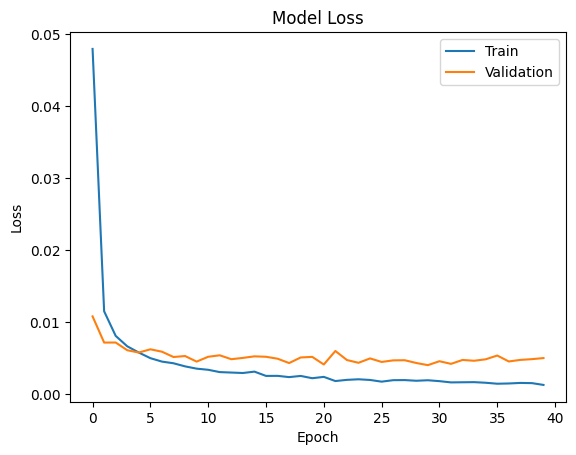

In [25]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

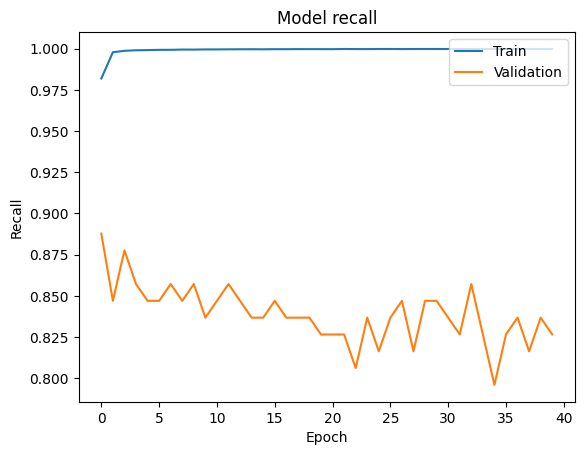

In [26]:
# Plotting recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [31]:
from sklearn.metrics import recall_score, precision_score, f1_score

def evaluate_model(X_train, y_train, X_test, y_test, model):
    # Check if model is a Keras model (Sequential)
    if hasattr(model, "fit") and hasattr(model, "predict"):
        # Train the model
        model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=0)

        # Predict probabilities
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Convert probabilities -> class labels
        y_train_pred = (y_train_pred > 0.5).astype(int)
        y_test_pred = (y_test_pred > 0.5).astype(int)

    else:
        # For sklearn models
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Compute metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    return train_acc, test_acc, recall, precision, f1






In [32]:
models_n = [
    ('ANN', model_ann),
   ]
Final_summary = []
for name, model in models_n:
  train_acc, test_acc, recall, precision, f1 = evaluate_model(
      X_train_resampled, y_train_resampled, X_test, y_test, model
  )

  Final_summary.append({
      'Model': name,  # get model name automatically
      'Train Accuracy': train_acc,
      'Test Accuracy': test_acc,
      'Recall Score': recall,
      'Precision Score': precision,
      'F1 Score': f1
  })

Final_results_df = pd.DataFrame(Final_summary).round(4)

print(Final_results_df.to_string(index=False))

14216/14216 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model  Train Accuracy  Test Accuracy  Recall Score  Precision Score  F1 Score
  ANN          0.9999         0.9994        0.8163           0.8247    0.8205


| Model                       | Train Accuracy | Test Accuracy | Recall   | Precision | F1 Score |
| --------------------------- | -------------- | ------------- | -------- | --------- | -------- |
| Random Forest               | 0.999996       | 0.999596      | 0.785714 | 0.974684  | 0.870056 |
| Random Forest + SMOTE       | 1.000000       | 0.999561      | 0.836735 | 0.901099  | 0.867725 |
| XGBoost                     | 1.000000       | 0.999579      | 0.806122 | 0.940476  | 0.868132 |
| XGBoost + SMOTE             | 0.999991       | 0.999175      | 0.846939 | 0.721739  | 0.779343 |
| KNN                         | 0.999570       | 0.999526      | 0.775510 | 0.938272  | 0.849162 |
| KNN + SMOTE                 | 0.999468       | 0.998174      | 0.867347 | 0.482955  | 0.620438 |
| Decision Tree               | 1.000000       | 0.999105      | 0.775510 | 0.723810  | 0.748768 |
| Decision Tree + SMOTE       | 1.000000       | 0.997735      | 0.755102 | 0.413408  | 0.534296 |
| AdaBoost                    | 0.999127       | 0.999140      | 0.683673 | 0.788235  | 0.732240 |
| AdaBoost + SMOTE            | 0.948257       | 0.964977      | 0.938776 | 0.044210  | 0.084442 |
| Logistic Regression         | 0.999228       | 0.999140      | 0.602041 | 0.855072  | 0.706587 |
| Logistic Regression + SMOTE | 0.949141       | 0.974580      | 0.928571 | 0.059399  | 0.111656 |
| Gradient Boosting           | 0.999184       | 0.998947      | 0.602041 | 0.737500  | 0.662921 |
| Gradient Boosting + SMOTE   | 0.979083       | 0.988764      | 0.928571 | 0.125691  | 0.221411 |
| Deep_learning_ANN + SMOTE  | 0.9999       | 0.9994      | 0.8163 | 0.8247  | 0.8205 |

Saving the randomforrest model

In [ ]:
#saving the model

import joblib
